In [569]:
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8,6
import pandas as pd
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Проверяем корреляцию средней оценки экшн\научной фантастики с ее бюджетом

Сначала подготавливаем данные, оставляем только нужные колонки, genres представлена в виде строк, проверяем строку на содержание "Science Fiction" и "Action".
Используем sns.joint_plot для визуализации соотношения двух численных переменных, бюджета и средней оценки.


In [570]:
dataset = pd.read_csv('tmdb_5000_movies.csv').dropna()

In [571]:
dataset.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [572]:
useful_cols = ["budget", "genres", "vote_average"]

In [573]:
data = dataset[useful_cols]

In [574]:
data_for_action_SF = data[data['genres'].str.contains("Action") & data['genres'].str.contains("Science Fiction")]

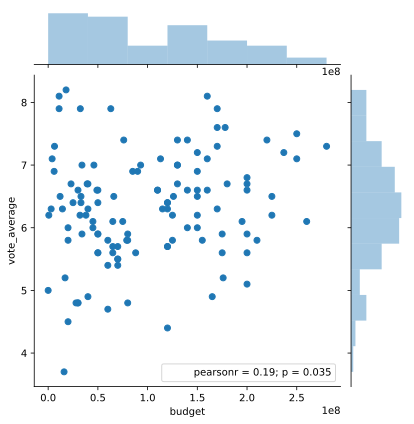

In [575]:
sns.jointplot(x='budget', y='vote_average', data=data_for_action_SF, kind='scatter')

In [ ]:
'''Не уверен, накосялил ли с данными, или большое количество старой (читай, более дешевой) фантастики
сильно увеличило кол-во фильмов с низким бюджетом и высокой оценкой'''

## Сравним распределение оценок уже рассмотренной нами категории и, к примеру, Action\Drama.
Используем гистограммы matplotlib.pyplot, наглядно показывающие распределение.

In [576]:
data_for_action_drama = data[data['genres'].str.contains("Action") & data['genres'].str.contains("Drama")]

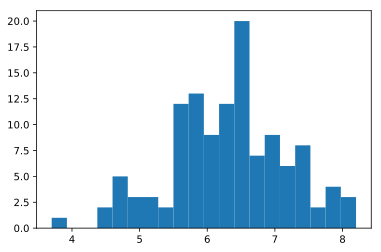

In [577]:
plt.hist(data_for_action_SF["vote_average"], bins = 20 )
plt.show()

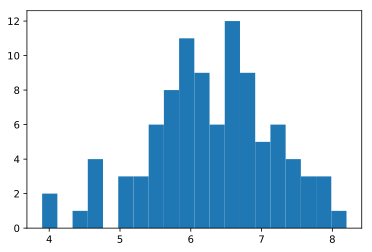

In [578]:
plt.hist(data_for_action_drama["vote_average"], bins = 20 )
plt.show()

In [579]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

## Проанализируем, как средний бюджет меняется со временем
Используем plotly для отображения 

In [580]:
useful_cols = ['release_date', 'budget']

In [581]:
data = dataset[useful_cols]

In [582]:
pd.options.mode.chained_assignment = None 
data['release_date'] = pd.to_datetime(data['release_date'])

In [583]:
data.sort_values(by='release_date', inplace= True)

In [584]:
data.head(1)

,release_date,budget
4259,1937-12-20,1488423


In [585]:
data.tail(1)

,release_date,budget
4255,2017-02-03,0


In [586]:
trace0 = go.Scatter(x = data.release_date, y = data.budget,  mode = 'lines')

layout = {'title': 'Statistics of movie budget'}
fig = go.Figure(data=[trace0], layout=layout)

iplot(fig, show_link = False)

## Рассмотрим корреляцию бюджета и дохода.

Для наглядности используем stacked bar.

In [587]:
useful_cols = ['budget', 'revenue']

In [588]:
data = dataset[useful_cols]


In [589]:
data.head(1)

,budget,revenue
0,237000000,2787965087


(-0.5, 1492.5, 0.0, 3176213341.3499999)

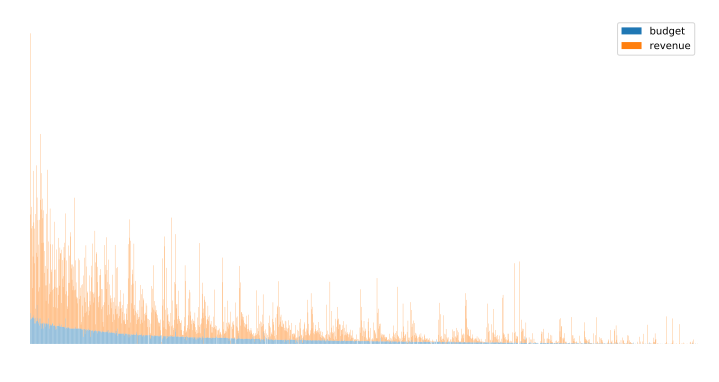

In [590]:
data.plot(kind='bar', rot=45, stacked=True, figsize=(12,6)).axis('off') 
#Если не отключать подпись оси Х, получается месево


## Посмотрим, влияет ли бюджет фильма на количество поставленных оценок и их распределение
Для отображения трех переменных хорошо подходит bubble chart

In [591]:
useful_cols = ["budget", "vote_average", 'vote_count']

In [592]:
data = dataset[useful_cols]

In [593]:
data.head(1)

,budget,vote_average,vote_count
0,237000000,7.2,11800


In [611]:
trace0 = go.Scatter(
    x=data.budget,
    y=data.vote_average,
    mode = 'markers+text',
    marker = dict(
    size = 1/200*data.vote_count))

layout = {
    'title': 'Статистика по бюджету, оценкам и их количеству',
    'xaxis': {'title': 'Бюджет'},
    'yaxis': {'title': 'Оценки'}}
viz_data = [trace0]

fig = go.Figure(data = viz_data, layout = layout)

iplot(fig, show_link=False)